In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import transformers
import load_data
import torch
from matplotlib import pyplot as plt
from torch import nn
from transformers import BertModel, BertTokenizer, CamembertModel, CamembertTokenizer
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import confusion_matrix
import os
import gc
from pydub import AudioSegment
import os
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU ou CPU
print(torch.cuda.is_available())
import librosa
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import CamembertTokenizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import gc
import numpy as np
import pandas as pd
import librosa
from pydub import AudioSegment
from sklearn.model_selection import train_test_split
from transformers import CamembertTokenizer
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder

False


In [13]:
# ------------------- CHARGEMENT ET PRÉTRAITEMENT DES DONNÉES TEXTUELLES -------------------

transcr_path = 'paco-cheese/transcr'
data = load_data.load_all_ipus(folder_path=transcr_path, load_words=True) #fonction donnée par le prof

In [14]:
# Load the data into a DataFrame
df = pd.DataFrame(data)

# Create a new list 'y' to store 1s and 0s based on speaker change
y = [0]  # Initialize the first element to 0, as there's no previous speaker to compare with.

# Iterate over the DataFrame, starting from the second row
for i in range(0, len(df)-1):
    # Check if the current speaker is different from the previous one
    if df['speaker'][i] != df['speaker'][i+1]:
        y.append(1)  # Speaker changed
    else:
        y.append(0)  # Speaker did not change

y
indices = [i for i, x in enumerate(y) if x == 1]
print(len(indices))
print(indices)
#affiche speaker différent dans df

for i in indices:
    print(df['speaker'][i])


df[len(indices)-5:]
#look for speaker LS in df
ls=df[df['speaker']=='LS']
ls
#check si un speaker est a nan:
df[df['speaker'].isnull()]

11497
[2, 205, 279, 281, 282, 296, 297, 305, 308, 315, 323, 334, 335, 336, 343, 346, 361, 371, 375, 383, 399, 427, 428, 432, 447, 455, 459, 480, 481, 487, 498, 504, 505, 570, 571, 604, 607, 621, 624, 643, 646, 652, 656, 669, 671, 674, 691, 692, 709, 712, 734, 759, 760, 785, 786, 821, 825, 860, 862, 869, 879, 880, 926, 929, 954, 956, 958, 992, 995, 1010, 1022, 1025, 1034, 1036, 1043, 1048, 1067, 1068, 1074, 1078, 1079, 1090, 1091, 1107, 1110, 1117, 1118, 1121, 1127, 1139, 1141, 1159, 1163, 1186, 1190, 1193, 1198, 1211, 1218, 1224, 1225, 1235, 1245, 1249, 1269, 1278, 1280, 1303, 1305, 1344, 1345, 1366, 1370, 1377, 1379, 1383, 1389, 1395, 1412, 1420, 1432, 1433, 1434, 1449, 1481, 1493, 1495, 1502, 1503, 1513, 1515, 1524, 1527, 1552, 1562, 1586, 1587, 1600, 1605, 1609, 1610, 1611, 1663, 1684, 1707, 1744, 1748, 1760, 1767, 1775, 1797, 1810, 1835, 1837, 1844, 1859, 1862, 1875, 1876, 1883, 1884, 1890, 1892, 1898, 1907, 1935, 1959, 1960, 1962, 1988, 2000, 2011, 2022, 2026, 2031, 2032, 2037, 20

,ipu_id,speaker,start_ipu,stop_ipu,text_ipu,is_main_speaker,turn_at_start,turn_after,turn_start_word,yield_at_end,request_at_start,start_words,stop_words,duration,text_words,request_after_word,turn_after_word,is_ipu_end,dyad
68804,0,NaN,6.020,6.485,après toi,True,False,True,6.485,True,False,6.020,6.270,0.250,après,False,False,False,transcr\LSNA
68805,0,NaN,6.020,6.485,après toi,True,False,True,6.485,True,False,6.270,6.485,0.215,toi,False,False,True,transcr\LSNA
68881,12,NaN,34.460,35.041,à mon tour,True,True,False,NaN,False,True,34.460,34.570,0.110,à,True,False,False,transcr\LSNA
68882,12,NaN,34.460,35.041,à mon tour,True,True,False,NaN,False,True,34.570,34.670,0.100,mon,False,False,False,transcr\LSNA
68883,12,NaN,34.460,35.041,à mon tour,True,True,False,NaN,False,True,34.670,35.041,0.371,tour,False,False,True,transcr\LSNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73318,681,NaN,1297.071,1298.746,c'est censé être un outil pour la pratique,True,False,False,NaN,False,False,1298.241,1298.746,0.505,pratique,False,False,True,transcr\LSNA
73320,683,NaN,1299.465,1300.329,et non pas l'inverse,True,False,True,1300.329,True,False,1299.465,1299.545,0.080,et,False,False,False,transcr\LSNA
73321,683,NaN,1299.465,1300.329,et non pas l'inverse,True,False,True,1300.329,True,False,1299.545,1299.855,0.310,non pas,False,False,False,transcr\LSNA
73322,683,NaN,1299.465,1300.329,et non pas l'inverse,True,False,True,1300.329,True,False,1299.855,1299.885,0.030,l',False,False,False,transcr\LSNA


In [51]:
# df_save=df.copy()

In [99]:
df=df_save[df_save['dyad']=='transcr\AAOR']
df.shape

(4376, 20)

# Process videos

### obtenirs les paths

In [54]:
# video_files_path = 'paco-cheese/video/video/'
#trouver les path des videos
def find_video_file(dyad, first_speaker):
    dyad = dyad.split('\\')[1]
    if isinstance(first_speaker, float):
        first_speaker = "NA"

    second_speaker = dyad.replace(first_speaker, "")

    subdirs = ['cheese', 'paco']
    for subdir in subdirs:
        media_files_path = f'paco-cheese/video/video/{subdir}/'
        for file_name in os.listdir(media_files_path):
            if first_speaker in file_name and second_speaker in file_name:
                return os.path.join(media_files_path, file_name)

    return None
for index, row in df.iterrows():
    first_speaker = str(row['speaker']) if not pd.isna(row['speaker']) else "NA"
    video_path = find_video_file(row['dyad'], first_speaker)

    print(video_path)

paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/vide

paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/vide

paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/vide

paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/vide

paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/vide

paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/vide

paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/vide

paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/video/video/cheese/AA_OR.mp4
paco-cheese/vide

### Extraires les differentes features :

In [104]:
import cv2
import numpy as np
import pandas as pd
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

# Fonction pour extraire des segments de la vidéo
def extract_video_segments(video_file_path, start_ms, end_ms):
    cap = cv2.VideoCapture(video_file_path)
    frames = []
    fps = cap.get(cv2.CAP_PROP_FPS)
    start_frame = int(start_ms * fps / 1000)
    end_frame = int(end_ms * fps / 1000)
    
    current_frame = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or current_frame > end_frame:
            break
        if current_frame >= start_frame:
            frames.append(frame)
        current_frame += 1
    cap.release()
    return frames

# Fonction de prétraitement de chaque cadre
def preprocess_frame(frame):
    frame_resized = cv2.resize(frame, (224, 224))  # Redimensionnement pour VGG16
    return frame_resized

# Classe pour l'extraction de caractéristiques
class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, frame):
        frame = np.expand_dims(frame, axis=0)
        frame = preprocess_input(frame)
        features = self.model.predict(frame)
        return features.squeeze()

# Fonction pour fusionner les caractéristiques
def fuse_features(features):
    return np.mean(features, axis=0) if features else np.zeros((512,))

# Initialisation de l'extracteur de caractéristiques
feature_extractor = FeatureExtractor()

# Exemple d'utilisation
X_video = []

for index, row in df.iterrows():
    first_speaker = str(row['speaker']) if not pd.isna(row['speaker']) else "NA"
    video_file_path = find_video_file(row['dyad'], first_speaker)

    if video_file_path:
        print(f"Traitement du fichier vidéo : {video_file_path}")
        start_ms = int(row['start_ipu'] * 1000)
        end_ms = int(row['stop_ipu'] * 1000)
        frames = extract_video_segments(video_file_path, start_ms, end_ms)

        if not frames:
            print("Aucun cadre extrait du fichier vidéo.")
            X_video.append(np.zeros((512,)))
            continue
        for frame in frames:
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.show()

        print(f"Nombre de cadres extraits : {len(frames)}")
        frames = [preprocess_frame(frame) for frame in frames]
        features = extract_video_features(frames, feature_extractor)
        video_features = fuse_features(features)
        X_video.append(video_features)
        print(f"Caractéristiques vidéo extraites : {video_features}")
    else:
        print(f"Aucun chemin de fichier vidéo trouvé pour {row['dyad']} et {first_speaker}")
        X_video.append(np.zeros((512,)))

X_video = np.array(X_video)


In [74]:
import cv2
import numpy as np

def extract_frames(video_path, max_frames=100):
    # Ouvrir la vidéo
    cap = cv2.VideoCapture(video_path)

    frames = []
    try:
        while True:
            # Lire frame par frame
            ret, frame = cap.read()

            # Si fin de la vidéo, quitter la boucle
            if not ret or len(frames) == max_frames:
                break

            # Traitement optionnel du frame ici
            # ...

            # Ajouter le frame à la liste
            frames.append(frame)
    finally:
        # Libérer le capture vidéo
        cap.release()

    return frames

# Chemin vers la vidéo
video_path = 'paco-cheese/video/video/cheese/AA_OR.mp4'

# Extraction des frames
frames = extract_frames(video_path)

# Conversion en un tableau numpy pour X_train
X_train = np.array(frames)


In [75]:
X_train

array([[[[126, 107, 120],
         [123, 104, 117],
         [122, 103, 116],
         ...,
         [104, 111, 124],
         [ 98, 105, 118],
         [ 94, 101, 114]],

        [[126, 107, 120],
         [123, 104, 117],
         [123, 104, 117],
         ...,
         [103, 110, 123],
         [ 97, 104, 117],
         [ 93, 100, 113]],

        [[127, 108, 121],
         [126, 107, 120],
         [122, 106, 118],
         ...,
         [103, 110, 123],
         [ 97, 104, 117],
         [ 93, 100, 113]],

        ...,

        [[ 63,  80, 110],
         [ 63,  80, 110],
         [ 63,  80, 110],
         ...,
         [ 65,  84, 109],
         [ 65,  84, 109],
         [ 65,  84, 109]],

        [[ 62,  79, 109],
         [ 62,  79, 109],
         [ 62,  79, 109],
         ...,
         [ 65,  84, 109],
         [ 65,  84, 109],
         [ 65,  84, 109]],

        [[ 61,  78, 108],
         [ 61,  78, 108],
         [ 61,  78, 108],
         ...,
         [ 65,  84, 109],
        

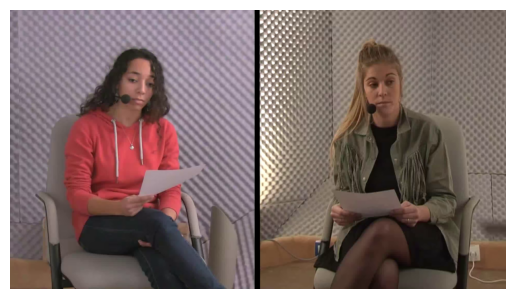

In [77]:
#Afficher les frames pour voir vite fait : 
frame_rgb = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB)

# Utiliser matplotlib pour afficher l'image
plt.imshow(frame_rgb)
plt.axis('off')  # Désactiver les axes pour une visualisation plus claire
plt.show()


# Process des audios

In [52]:
# ------------------- EXTRACTION DES CARACTÉRISTIQUES AUDIO -------------------
audio_files_path = 'paco-cheese/audio/2_channels/'

# Cette fonction prend une entrée de dyade et renvoie le chemin du fichier audio correspondant
def find_audio_file(dyad,first_speaker):
    dyad=dyad.split('\\')[1]
    #first_speaker=str(first_speaker)
    if isinstance(first_speaker, float):
        first_speaker="NA"
        print(first_speaker)
    second_speaker=dyad.replace(first_speaker,"")
    #if "LS" in dyad:
    #    print("trouvé")
    # Trouver le fichier audio qui contient l'identifiant de la dyade
    for file_name in os.listdir(audio_files_path):
        #if("LS" in dyad):
            #print(first_speaker)
            #print(second_speaker)
            #print(file_name)
        if first_speaker in file_name and second_speaker in file_name:
            return os.path.join(audio_files_path, file_name)
    return None

# Cette fonction extrait les segments audio en utilisant les informations de la dyade et les timestamps
def extract_audio_segments(df):
    audio_segments = []
    audio_file_path = ""
    nombre_boucle=0
    for index, row in df.iterrows():
        nombre_boucle+=1
        first_speaker=str(row['speaker'])
        if isinstance(row['speaker'], float):
            first_speaker="NA"
            
            
        if first_speaker not in audio_file_path:
            # Si le fichier audio n'a pas encore été chargé, chargez-le
            audio = None
            gc.collect()
            audio_file_path = find_audio_file(row['dyad'],first_speaker)
            if audio_file_path is None:
                print("Audio file not found for dyad {}".format(row['dyad']))
                audio_file_path = ""
                continue
            audio = AudioSegment.from_file(audio_file_path)
            #print(index)
            print(audio_file_path)  
        if audio_file_path!="":
            start_ms = int(row['start_ipu'] * 1000)
            end_ms = int(row['stop_ipu'] * 1000)
            segment = audio[start_ms:end_ms]
            audio_segments.append(segment)
            # Vous pouvez également enregistrer le segment si nécessaire
            # segment.export('segment_{}.wav'.format(index), format='wav')
        if audio_file_path=="":
            print("trouvé")
            print(audio_file_path)
    return audio_segments,nombre_boucle

# Utilisez la fonction pour votre DataFrame
audio_segments,nombre_boucle = extract_audio_segments(data)

def extract_features(audio_segment):
    # Convert PyDub audio segment to numpy array
    samples = np.array(audio_segment.get_array_of_samples())

    # Normalize the audio samples to floating-point values
    if audio_segment.sample_width == 2:
        samples = samples.astype(np.float32) / 32768
    elif audio_segment.sample_width == 4:
        samples = samples.astype(np.float32) / 2147483648

    # Use librosa to extract MFCCs
    mfccs = librosa.feature.mfcc(y=samples, sr=audio_segment.frame_rate, n_mfcc=13)
    
    # Average the MFCCs over time
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean

paco-cheese/audio/2_channels/AA_OR.wav
paco-cheese/audio/2_channels/AC_MZ.wav
paco-cheese/audio/2_channels/AS_EP.wav
paco-cheese/audio/2_channels/AW_CG.wav
paco-cheese/audio/2_channels/BE_CR.wav
paco-cheese/audio/2_channels/CM_MCC.wav
paco-cheese/audio/2_channels/ER_AG.wav
paco-cheese/audio/2_channels/FB_CB.wav
paco-cheese/audio/2_channels/FS_MG.wav
paco-cheese/audio/2_channels/JA_EA.wav
paco-cheese/audio/2_channels/JDS_LS.wav
paco-cheese/audio/2_channels/LJ_JL.wav
paco-cheese/audio/2_channels/JR_BG.wav
paco-cheese/audio/2_channels/JS_CL.wav
paco-cheese/audio/2_channels/LB_MA.wav
paco-cheese/audio/2_channels/LE_LB.wav
paco-cheese/audio/2_channels/LJ_JL.wav
paco-cheese/audio/2_channels/LP_MA.wav
paco-cheese/audio/2_channels/LS_NA.wav
paco-cheese/audio/2_channels/MA_PC.wav
paco-cheese/audio/2_channels/MC_MRH.wav
paco-cheese/audio/2_channels/MD_AD.wav
paco-cheese/audio/2_channels/ML_HE.wav
paco-cheese/audio/2_channels/NL_PG.wav
paco-cheese/audio/2_channels/PO_MH.wav
paco-cheese/audio/2_ch

In [53]:
print(len(audio_segments))
print(len(y))
print(nombre_boucle)

110544
110544
110544


In [54]:
# Extraction des caractéristiques MFCC pour tous les segments audio

#************************************** A CHANGER A LA FIN
X_audio = np.array([extract_features(segment) for segment in audio_segments])

C:\Users\paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1920
  warnings.warn(
C:\Users\paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1280
  warnings.warn(
C:\Users\paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1120
  warnings.warn(
C:\Users\paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1888
  warnings.warn(
C:\Users\paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1408
  warnings.warn(
C:\Users\paul\AppData\Local\Programs\Python\Python311\Lib\si

In [55]:
#************************************** A CHANGER A LA FIN
# Juste pour faire une save avant de couper les df pour faire des tests
df_save=df
X_audio_save=X_audio
y_save=y

In [56]:
#************************************** A CHANGER A LA FIN

limit=1000    #107603  #110544
X_audio=X_audio_save[:limit]
y=y_save[:limit]
df=df_save[:limit]

# Nouveau modele, test

In [57]:
# Chargement des données textuelles et extraction des caractéristiques
# Assurez-vous que la variable 'data' est chargée comme dans votre script précédent
text_features = data['text_words'][:limit]

# Remplacer les valeurs NaN par un placeholder
text_features = text_features.fillna('[UNK]')

# Utiliser CamemBERT tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

def tokenize_and_pad(text, max_len=256):
    return tokenizer.encode(text, max_length=max_len, padding='max_length', truncation=True)

# Appliquer le tokenizer à toutes les données textuelles
text_features = text_features.apply(lambda x: tokenize_and_pad(str(x)))

# Assurez-vous que 'X' est votre matrice de caractéristiques audio extraites
audio_features = torch.tensor(X_audio)

# Convertir les caractéristiques textuelles en tensor
text_features = torch.tensor(np.array(text_features.tolist()))

# Fusionner les caractéristiques audio et textuelles
combined_features = torch.cat((audio_features, text_features), dim=1)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.3, random_state=42)

In [58]:
# Affichage de la distribution des classes dans les ensembles d'entraînement et de test
train_class_distribution = pd.Series(y_train).value_counts()
test_class_distribution = pd.Series(y_test).value_counts()

print("Distribution des classes dans l'ensemble d'entraînement :")
print(train_class_distribution)
print("Distribution des classes dans l'ensemble de test :")
print(test_class_distribution)


Distribution des classes dans l'ensemble d'entraînement :
0    652
1     48
Name: count, dtype: int64
Distribution des classes dans l'ensemble de test :
0    279
1     21
Name: count, dtype: int64


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from transformers import CamembertModel
from torch.utils.data import Dataset, DataLoader

# Assuming X_audio is your audio features and text_features is your tokenized text data
# Make sure to adjust these as per your data processing

class EarlyFusionModel(nn.Module):
    def __init__(self, audio_feature_size, text_feature_size, dropout_rate=0.5):
        super(EarlyFusionModel, self).__init__()
        # CamemBERT for text features
        self.camembert = CamembertModel.from_pretrained('camembert-base')
        # Layers for audio features
        self.audio_fc1 = nn.Linear(audio_feature_size, 128)
        self.audio_fc2 = nn.Linear(128, 64)
        # Fusion and final layers
        self.fc1 = nn.Linear(64 + text_feature_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, audio_features, text_features):
        # Process audio features
        audio_x = F.relu(self.audio_fc1(audio_features))
        audio_x = F.relu(self.audio_fc2(audio_x))
        # Process text features
        text_x = self.camembert(text_features)[1]
        # Fuse audio and text features
        combined = torch.cat((audio_x, text_x), dim=1)
        # Final layers
        x = self.dropout(F.relu(self.fc1(combined)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = torch.sigmoid(self.fc3(x))
        return x

# Define the dataset
class CombinedDataset(Dataset):
    def __init__(self, audio_features, text_features, labels):
        self.audio_features = audio_features
        self.text_features = text_features
        self.labels = labels

    def __len__(self):
        return len(self.audio_features)

    def __getitem__(self, idx):
        return self.audio_features[idx], self.text_features[idx], self.labels[idx]

# Assuming X_audio, text_features, and y are numpy arrays
audio_feature_size = X_audio.shape[1]
temp_camembert = CamembertModel.from_pretrained('camembert-base')
text_feature_size = temp_camembert.config.hidden_size

# Splitting the data
X_audio_train, X_audio_test, text_features_train, text_features_test, y_train, y_test = train_test_split(X_audio, text_features, y, test_size=0.3, random_state=42)

# Creating DataLoaders
train_dataset = CombinedDataset(torch.tensor(X_audio_train), torch.tensor(text_features_train), torch.tensor(y_train))
test_dataset = CombinedDataset(torch.tensor(X_audio_test), torch.tensor(text_features_test), torch.tensor(y_test))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



C:\Users\paul\AppData\Local\Temp\ipykernel_29924\3044979374.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = CombinedDataset(torch.tensor(X_audio_train), torch.tensor(text_features_train), torch.tensor(y_train))
C:\Users\paul\AppData\Local\Temp\ipykernel_29924\3044979374.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = CombinedDataset(torch.tensor(X_audio_test), torch.tensor(text_features_test), torch.tensor(y_test))


In [ ]:
# Training and evaluation code
# Initialize the model
model = EarlyFusionModel(audio_feature_size, text_feature_size).to(device)

# Define class weights for BCEWithLogitsLoss
w_pos = 1 #1 pour l'instant pour test
print("Weight for positive class:", w_pos)
class_weights = torch.tensor([1.0, w_pos]).to(device)

# Use BCEWithLogitsLoss with weight for the positive class
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])

# Optimizer setup
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Number of training epochs
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (audio_inputs, text_inputs, labels) in enumerate(train_loader):
        audio_inputs, text_inputs, labels = audio_inputs.to(device), text_inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(audio_inputs, text_inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate and print the average loss over the epoch
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}')

correct = 0
total = 0
all_preds = []
all_labels = []

# Évaluation du modèle pour l'accuracy, le score F1 et la matrice de confusion
model.eval()
with torch.no_grad():
    for audio_inputs, text_inputs, labels in test_loader:
        audio_inputs, text_inputs, labels = audio_inputs.to(device), text_inputs.to(device), labels.to(device)
        outputs = model(audio_inputs, text_inputs)
        predicted = torch.sigmoid(outputs).squeeze() > 0.5

        # Pour l'accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Pour le score F1 et la matrice de confusion
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calcul de l'accuracy
accuracy = correct / total
print("#############################################")
print(f'Accuracy: {accuracy}')

# Calcul du score F1
f1 = f1_score(all_labels, all_preds)
print(f'F1 Score: {f1}')

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_matrix)
print("#############################################")

Weight for positive class: 1
Epoch 1/10, Average Loss: 0.7180
Epoch 2/10, Average Loss: 0.6931
Epoch 3/10, Average Loss: 0.6931
Epoch 4/10, Average Loss: 0.6931
